In [19]:
import os
import matplotlib.pyplot as plt
import control as ct
import numpy as np

In [20]:
def model(z,u,k):
    m1 = 4
    b = 100
    x1 = z[0]
    x2 = z[1]
    dx1dt = x2 
    dx2dt = -(b/m1)*x2 + u/m1
    return [dx1dt,dx2dt]

In [21]:
def forwardeuler(dz,z,step):
    z = z + step * dz
    return z

In [22]:
def poscont(x1,x2,posr,posrd,step):
    Kp = 500
    Kd =  5
    u = Kp*(posr-x1) + Kd*(posrd - x2)
    return u,posr

In [23]:
deltat = 0.0001
tf = 10
ti = 0
n = int(((tf-ti)/deltat)+1)
t = np.linspace(ti,tf,n)
Fext = np.zeros(n)
u = 0
z = np.zeros(2)
x1 = np.zeros(n)
x2 = np.zeros(n)
posrarrd = np.zeros(n)
posrarrd[1001:n] = 0
posrarr = np.zeros(n)
posrarr[1001:n] = 1
uarr = np.zeros(n)

In [24]:
for i in range(n):
    u,posrarr[i] = poscont(z[0],z[1],posrarr[i],posrarrd[i],deltat)
    dz = model(z,u,Fext[i])
    dz = np.array(dz)
    z = forwardeuler(dz,z,deltat)
    
    x1[i] = np.float64(z[0])
    x2[i] = np.float64(z[1])
    uarr[i] = u

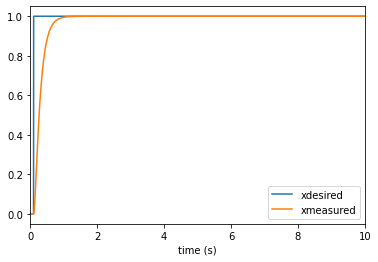

In [25]:
plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(0,10)
plt.plot(t,posrarr,label= 'xdesired')
plt.plot(t,x1,label = 'xmeasured')
plt.legend()

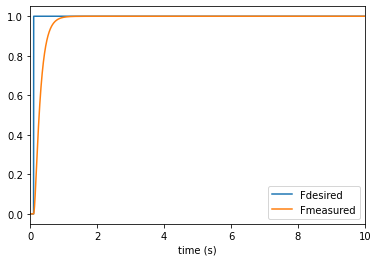

In [26]:
plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(-0.001,10)
plt.plot(t,posrarr,label= 'Fdesired')
plt.plot(t,x1,label = 'Fmeasured')
plt.legend()

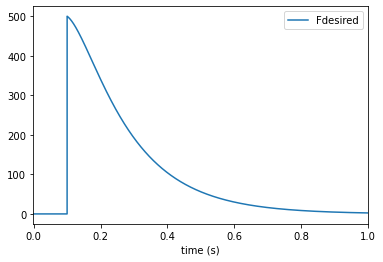

In [27]:
plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(-0.001,1)
plt.plot(t,uarr,label= 'Fdesired')
plt.legend()